In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re


sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC


In [2]:
keys = ['probs_1', 'probs_2', 'sizes_1','sizes_2', 'n', 'm', 'noise']
params_kernel = {}
data_auc = {}
data = {}


# WL

In [18]:
# def readfoldertopandaWL(path):
#     """
#     Read files in a folder and concatenate them into an pandas data frame


#     """
#     onlyfiles = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

#     # read and append
#     df = []
#     cnt = 0
#     for file in onlyfiles:
#         tmp = pd.read_pickle(os.path.join(path, file))
#         ok = file.rsplit("norm", 1)[-1]
#         norm = int(re.findall(r'\d+', ok)[0])
#         tmp['normalize'] = norm
#         df.append(tmp)
#         if cnt < 10:
#             print(f'norm is {norm}')
#             cnt += 1

#     return pd.concat(df)


# def get_wl_iteration(string_list):
#     numbers_list = np.zeros(len(string_list))
#     for i, input_string in enumerate(string_list):
#         ok = input_string.rsplit("'n_iter'", 1)[-1]
#         numbers_list[i] = int(re.findall(r'\d+', ok)[0])
    
#     return numbers_list

data['WL'] = readfoldertopanda("../data/SBMOnlyRandomLabel/WLsubtree")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
data['WL'].columns

Index(['kernel', 'alpha', 'noise', 'normalize', 'wl_itr', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree'],
      dtype='object')

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


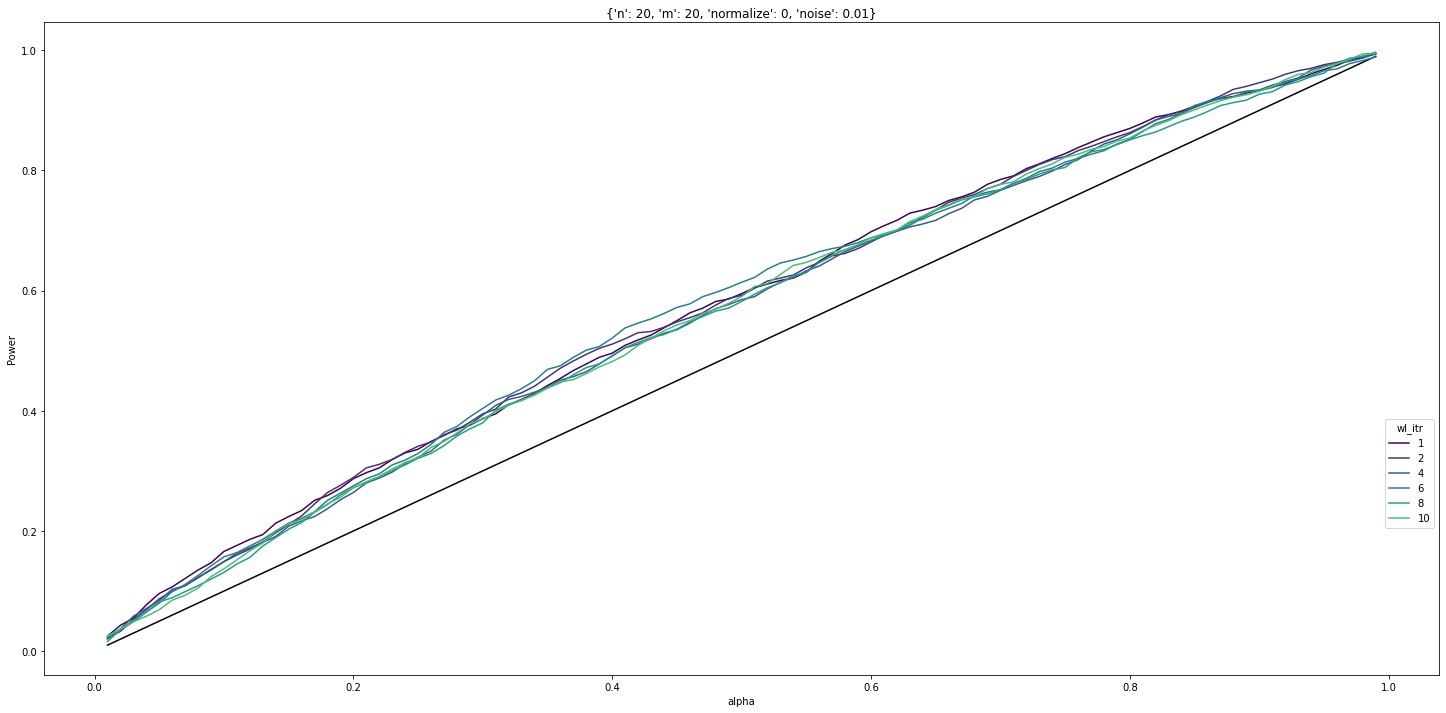

In [80]:
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.01
                }


plotVaryingBGDEG(df = data['WL'].copy(), param_vary_name = "wl_itr", params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")


In [54]:
params_kernel['WL'] = ['wl_itr', 'normalize']
data_auc['WL'] = findAUC(keys = keys, params = params_kernel['WL'], stats = ['MMD_b', 'MMD_u'], df = data['WL'] )

# SP

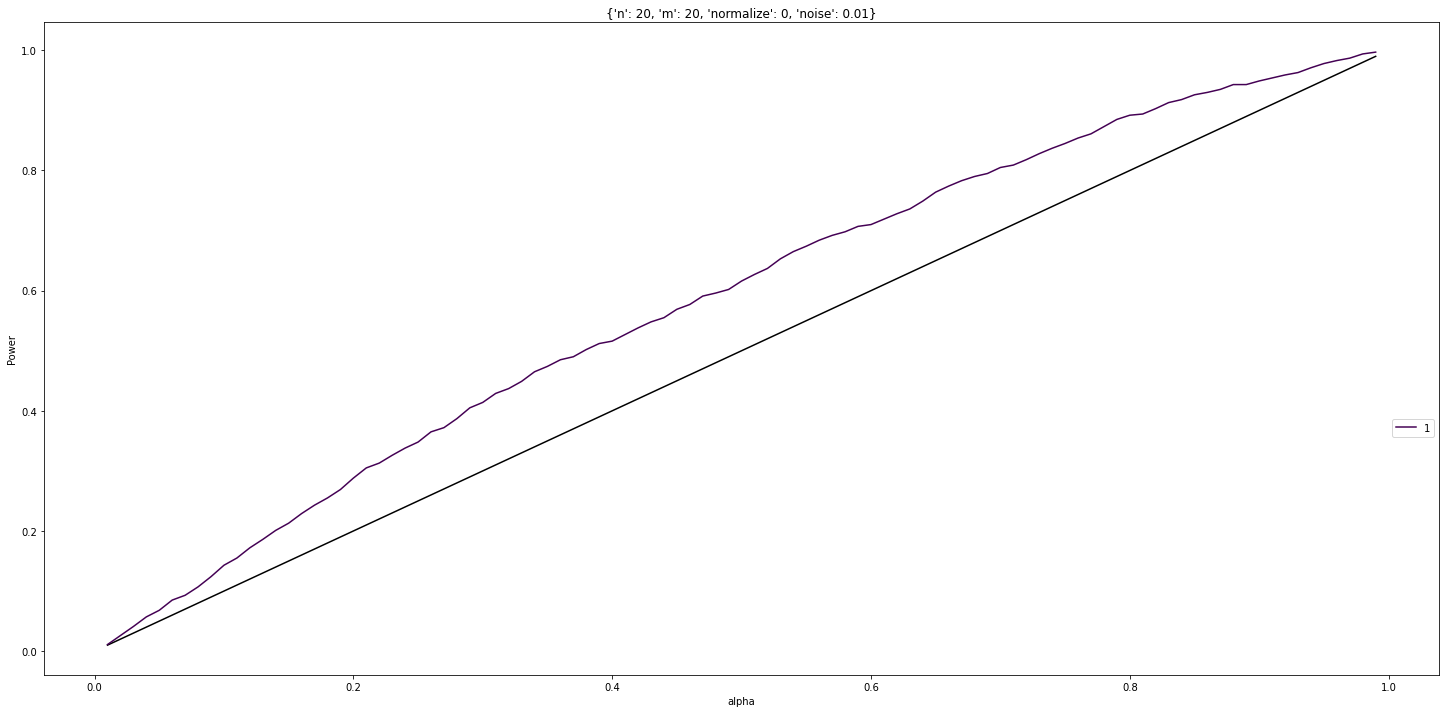

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,0.615017,0.615017
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,1,0.604673,0.604673
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.010,0,0.828340,0.828340
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.010,1,0.834137,0.834137
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.020,0,0.978287,0.978287


In [81]:

data['SP'] = readfoldertopanda("../data/SBMOnlyRandomLabel/SP")
data['SP'] .columns


params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.01
                }


plotVaryingBGDEG(df = data['SP'] .copy(), param_vary_name = '', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

params_kernel['SP'] = [ 'normalize']
data_auc['SP']  = findAUC(keys = keys, params = params_kernel['SP'], stats = ['MMD_b', 'MMD_u'], df = data['SP'] )
data_auc['SP'].head()


# WWL

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'nitr', 'with_labels', 'discount', 'sinkhorn'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


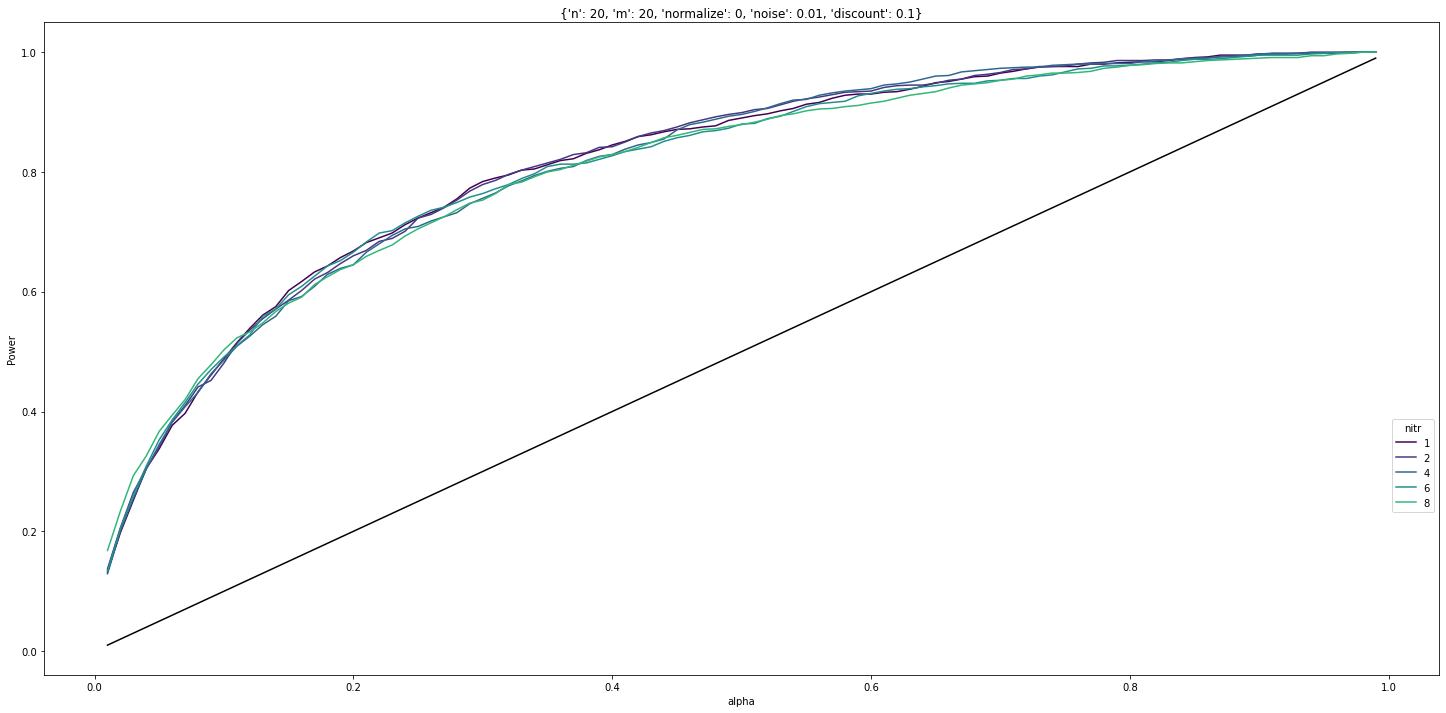

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,nitr,discount,sinkhorn,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,1,0.1,False,0.940157,0.940157
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,2,0.1,False,0.941587,0.941587
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,4,0.1,False,0.941640,0.941640
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,6,0.1,False,0.941590,0.941590
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,8,0.1,False,0.938793,0.938793


In [82]:

name = 'WWL'
data[name] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/{name}")
print(data[name].columns)


params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.01,
                #'nitr':4,
                'discount':0.1
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'nitr', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

params_kernel[name] = [ 'normalize', 'nitr', 'discount', 'sinkhorn']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()


# Propagation

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'w', 'tmax', 'M', 'sinkhorn'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


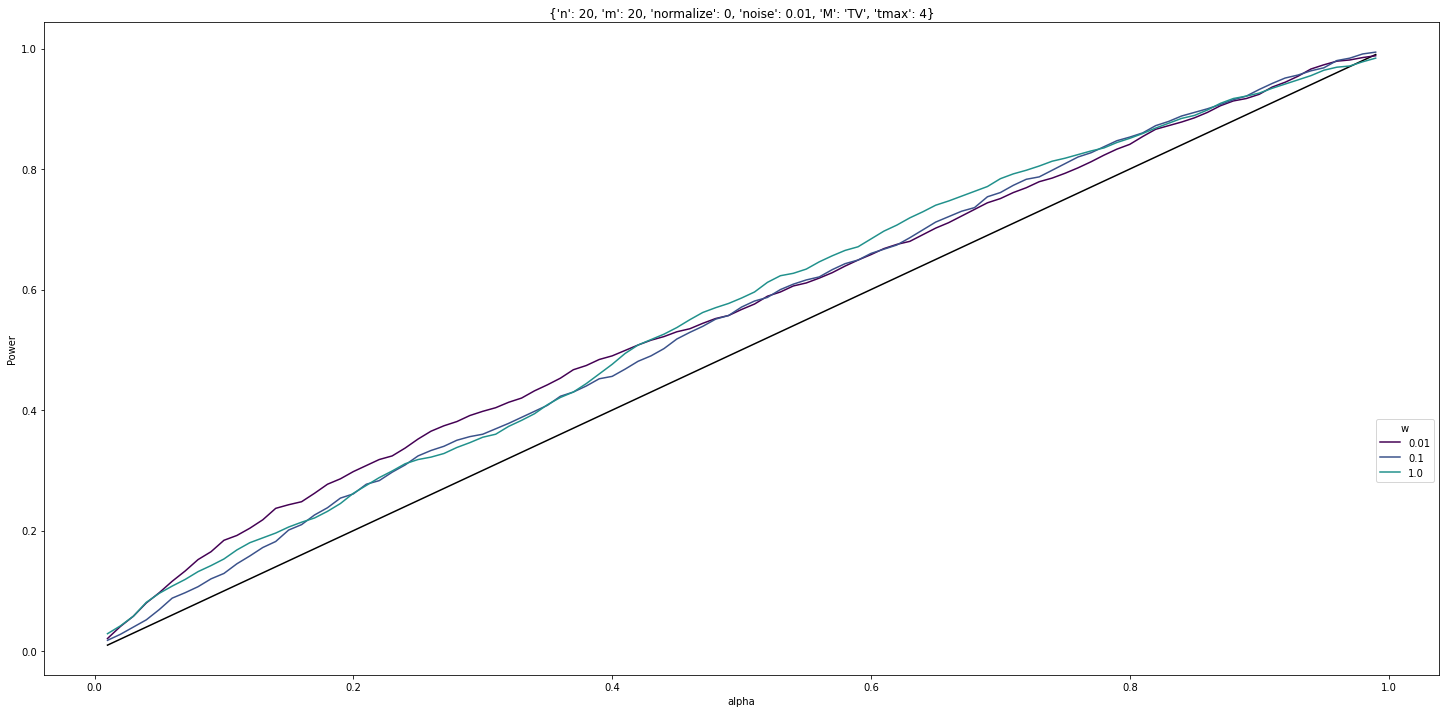

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,w,M,tmax,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,0.01,H,1,0.639490,0.640807
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,0.01,TV,1,0.677627,0.678530
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,0.01,H,2,0.577310,0.577330
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,0.01,TV,2,0.560463,0.560437
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,0.01,H,4,0.557800,0.557800


In [83]:
# Propagation
name = 'PROP'
data[name] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/{name}")
print(data[name].columns)


params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.01,
                'M':'TV',
                #'w':0.001
                'tmax':4
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'w', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

params_kernel[name] = [ 'normalize', 'w', 'M', 'tmax']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()

# Pyramid

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'L', 'dim', 'sinkhorn'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


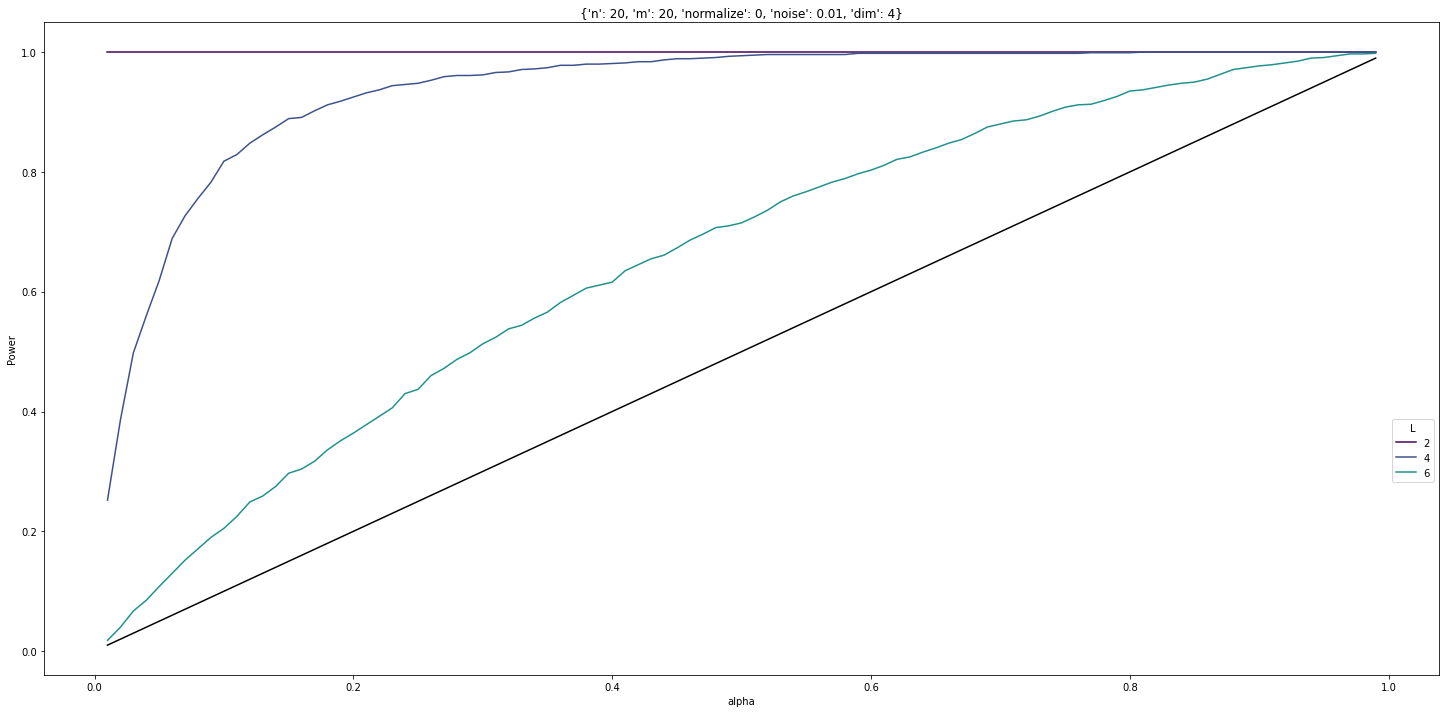

In [3]:
name = 'PYRAMID'
data[name] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/{name}")
print(data[name].columns)

TEST = data[name]


params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.01,
                'dim':4,
                #'L':4
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'L', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")


In [ ]:

params_kernel[name] = ['normalize', 'dim', 'L']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()

# WLOA

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'nitr', 'with_labels', 'sinkhorn'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


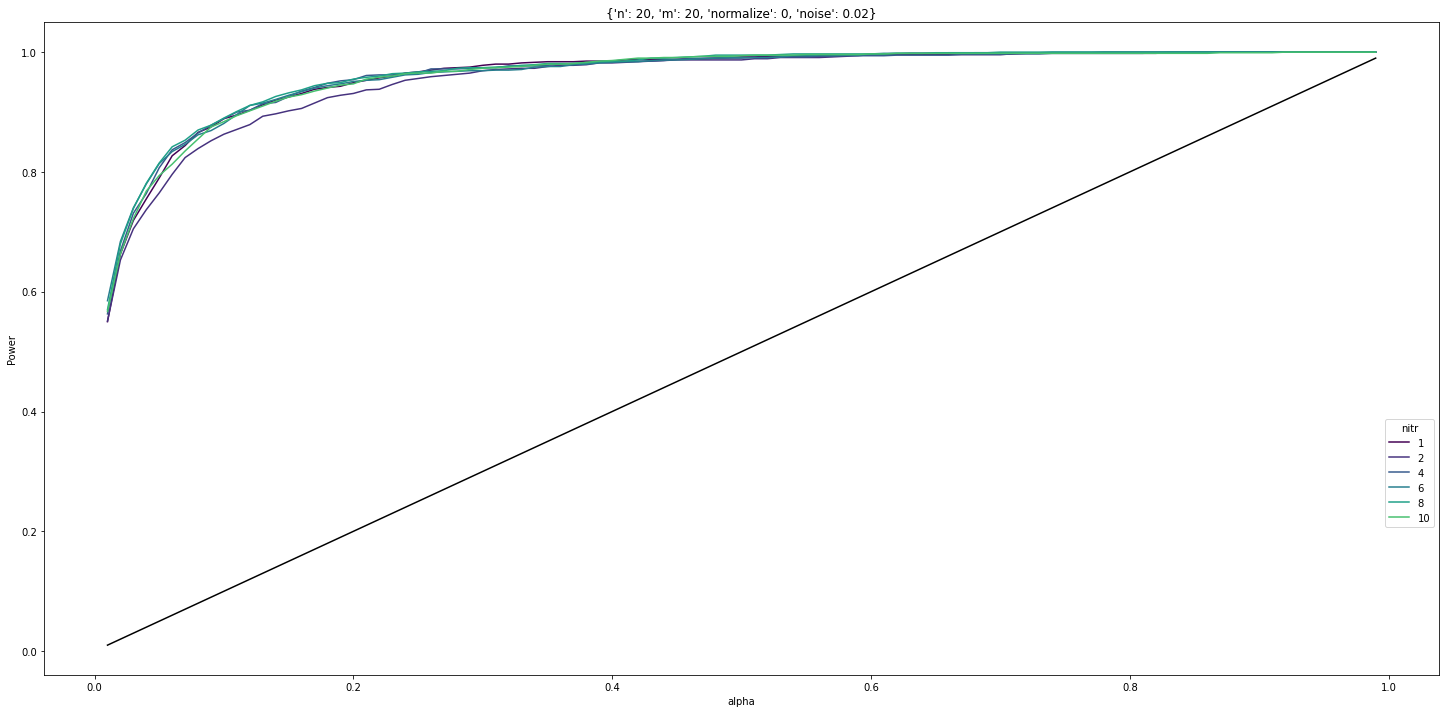

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,nitr,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,1,0.943333,0.943373
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,2,0.942030,0.941990
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,4,0.944757,0.944780
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,6,0.942403,0.942410
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,8,0.945393,0.945367


In [45]:
name = 'WLOA'
data[name] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/{name}")
print(data[name].columns)


params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.02
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'nitr', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

params_kernel[name] = ['normalize', 'nitr']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()

# VH

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'sinkhorn'],
      dtype='object')


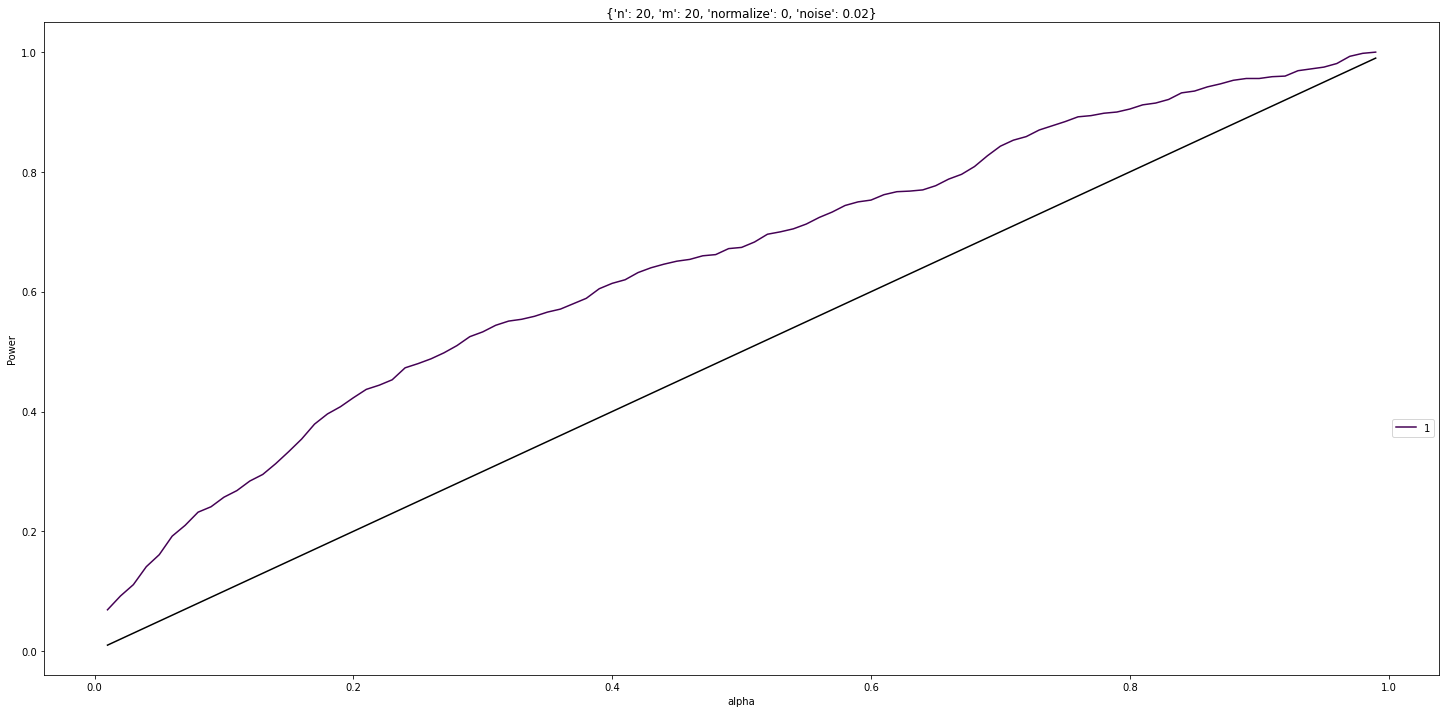

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,0.674673,0.676393
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,1,0.658287,0.658287
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.010,0,0.758457,0.759537
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.010,1,0.773227,0.773227
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.020,0,0.881307,0.881390


In [47]:
name = 'VH'
data[name] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/{name}")
print(data[name].columns)


params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.02
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = '', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

params_kernel[name] = ['normalize']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()

# ODD

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'dagh', 'sinkhorn'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


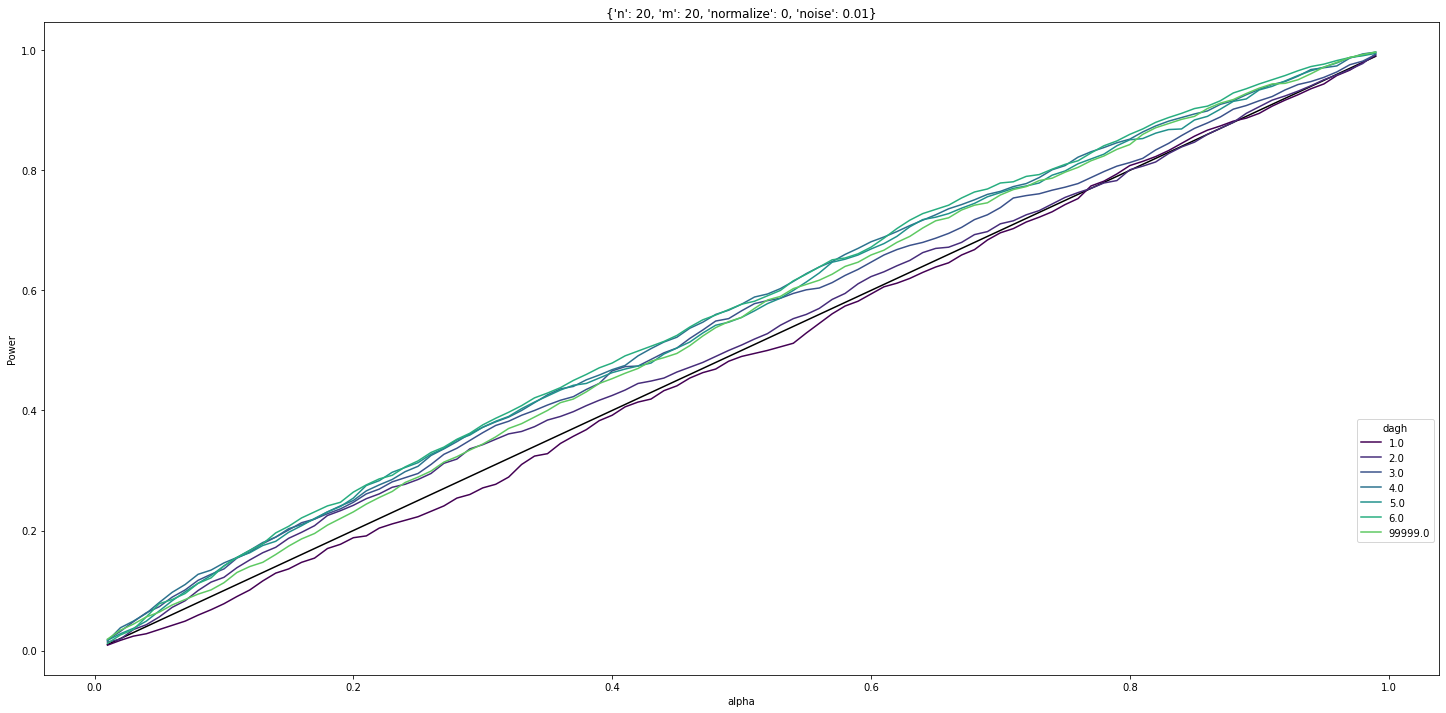

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,dagh,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,1.0,0.490837,0.490837
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,2.0,0.488827,0.488827
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,3.0,0.587933,0.587933
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,5.0,0.572360,0.572360
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,NaN,0.573263,0.573263


In [79]:
name = 'ODD'
data[name] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/{name}")
print(data[name].columns)


params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.01
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'dagh', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

params_kernel[name] = ['normalize', 'dagh']

data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()

# DK

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'nitr', 'with_labels', 'type', 'sinkhorn'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


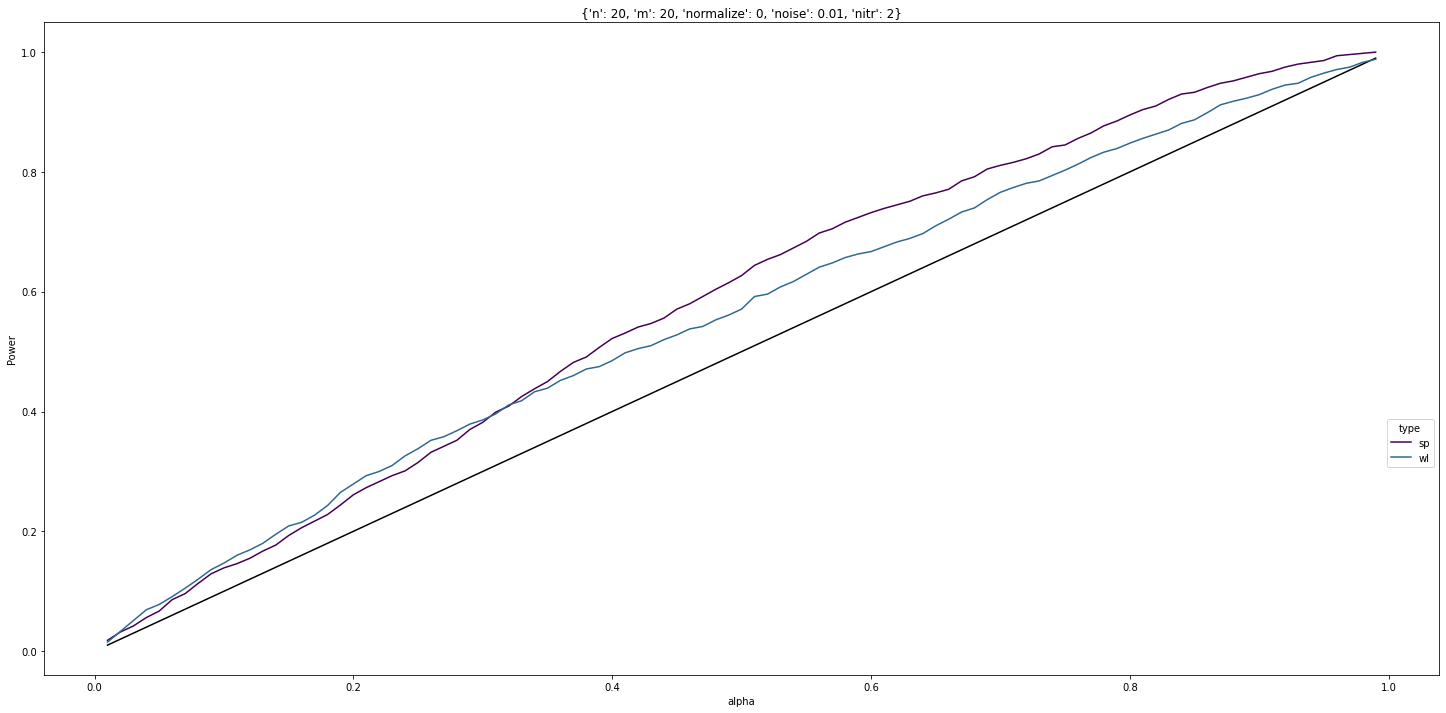

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,nitr,type,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,1,wl,0.580597,0.580583
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,2,sp,0.603090,0.603090
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,2,wl,0.569983,0.569957
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,4,wl,0.572090,0.572097
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,6,wl,0.565047,0.565080


In [78]:
name = 'DK'
data[name] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/{name}")
print(data[name].columns)


params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'noise':0.01,
                'nitr':2
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'type', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")

params_kernel[name] = ['normalize', 'nitr', 'type']

data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()

# Comparing all with best params

In [75]:

key_pair = pd.DataFrame({'n':20,
                'm':20,
                'noise':0.01,
                'probs_1':'[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0.07 0.2 ]]', 
                'probs_2':'[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0.07 0.2 ]]', 
                'sizes_1':'[30, 20, 25]',
                'sizes_2':'[30, 20, 25]',},
                 index = [0])

stat = 'MMD_u_auc'
stat_plot = 'MMD_u'

best = []

for k,v in data.items():

    k_data_max = data_auc[k].reset_index().merge(key_pair, on = keys)
    k_data_max = k_data_max[k_data_max.groupby(keys)[stat].transform(max) == k_data_max[stat]].iloc[[0]]
    tmp_data = v.reset_index().merge(k_data_max, on = keys + params_kernel[k])
    tmp_data['kernel_name'] = k
    best.append(tmp_data)




#idx = wl_auc.groupby(['nr_nodes_1', 'nr_nodes_2', 'degree_1','degree_2', 'n', 'm'])['MMD_u_auc'].transform(max) == wl_auc['MMD_b_auc']


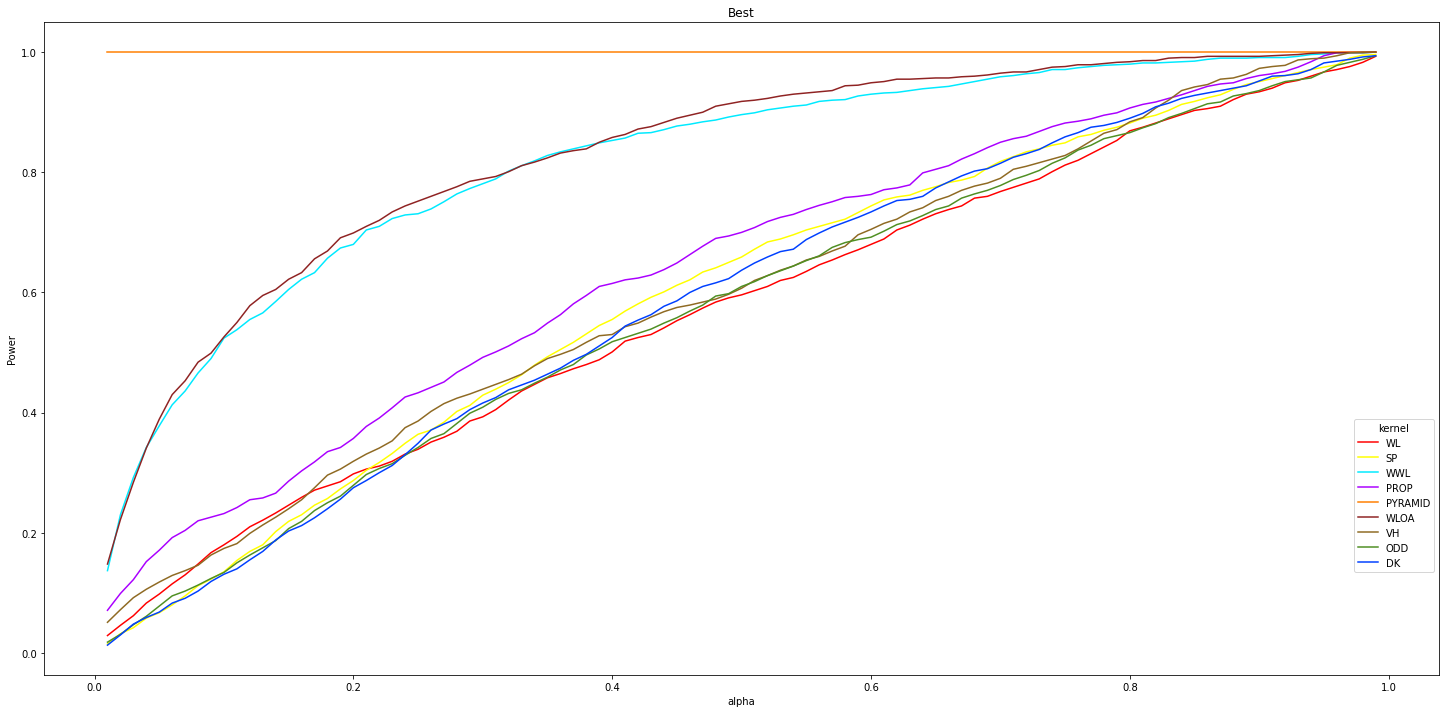

In [76]:
_, ax = plt.subplots(figsize = (25,12))


label = []
#icefire
#cmap = get_cmap(sns.color_palette("viridis", as_cmap=True)) # type: matplotlib.colors.ListedColormap
colors = ['#FF0000', '#FFFF00', '#00EAFF', '#AA00FF', '#FF7F00', '#8F2323', '#8F6A23', '#4F8F23', '#0040FF', '#737373', '#23628F']# cmap.colors[::int(len(cmap.colors)/(7+1))]  # type: list

for i,row in enumerate(best):

    ax.plot(row['alpha'], row[stat_plot], color =colors[i], label=str(row['kernel_name'].iloc[0]))
    label.append(str(row['kernel_name'].iloc[0]))


# ax.plot(graph_stat['alpha'], graph_stat['average_degree'], color =colors[i+1], label='average_degree')
# label.append('average_degree')



h, l = ax.get_legend_handles_labels()

ax.legend(handles=h, labels=label, 
        handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'kernel', bbox_to_anchor=(1, 0.4))

ax.set_xlabel('alpha')
ax.set_ylabel('Power')
ax.set_title(f'Best')


plt.show()

In [68]:
tmp = data_auc['PYRAMID']